# Study reference calibration spectra

- author : Sylvie Dagoret-Campagne
- date : April 23th 2018


In [45]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
import numpy as np
import pandas as pd
# Set up matplotlib and use a nicer set of plot parameters
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
import astropy
import astropy.units as u
from astropy.io import fits

In [48]:
from IPython.display import Image, display
from PIL import Image

In [49]:
import pysynphot as S
S.primary_area=1.02e5
S.binning=1.

In [50]:
CFHT_COLL_SURF=np.pi/4.*(3.6*u.m)**2/(u.cm)**2  # LSST collectif surface
WLMIN=3000.
WLMAX=11000.

In [51]:
NBINS=int(WLMAX-WLMIN)
BinWidth=(WLMAX-WLMIN)/float(NBINS)
WL=np.linspace(WLMIN,WLMAX,NBINS)

In [52]:
CFHT_COLL_SURF.decompose()

<Quantity 101787.6019763093>

In [53]:
S.refs.setref(area=CFHT_COLL_SURF.decompose(), waveset=None)

In [54]:
#S.refs.set_default_waveset(minwave=WLMIN, maxwave=WLMIN, num=NBINS, delta=1., log=True)

In [55]:
S.refs.showref()

thermtable: /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/mtab/tae17277m_tmt.fits
   waveset: Min: 500, Max: 26000, Num: 10000, Delta: None, Log: True
 comptable: /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/mtab/16n1832tm_tmc.fits
graphtable: /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/mtab/14l1632sm_tmg.fits
      area: 101787.601976


In [56]:
10**(S.units.ABZERO/2.5)

3.630780547701003e-20

# PySynPhot

**vegamag** offers a reasonable approximation to many of the conventional photometric systems that use the spectrum of Vega to define magnitude zero in one or more passbands. In broadband photometry, the relevant passband integral is calculated first for the source spectrum and then again for the spectrum of Vega, and the ratio of the two results is converted to a magnitude. This would not be a scientifically meaningful option for spectrophotometry.

Meanwhile, **abmag** and **stmag** are appropriate for either spectrophotometry or photometry. Their zero point values of 48.60 and 21.10 mag, respectively, are chosen for convenience so that Vega has $\rm{AB}_{\nu}$ and $\rm{ST}_{\lambda}$ magnitudes close to 0 in the Johnson $V$ passband, as shown in the following figure:

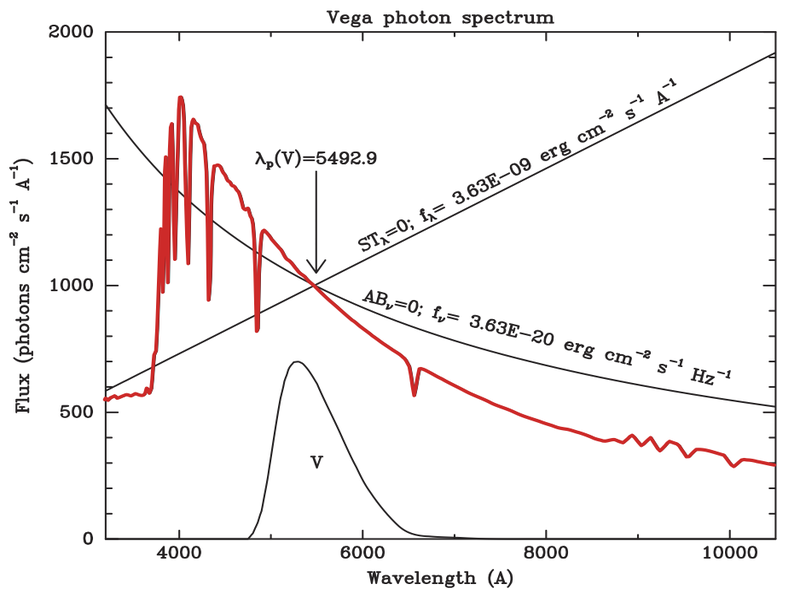

In [57]:
img=Image.open("Figures/VegaPhotomSys.png")
img = img.resize((800, 600),Image.ANTIALIAS)
display(img)

Standard photometric systems generally use the spectrum of Vega to define magnitude zero. The spectrophotometric magnitudes $\rm{AB}_{\nu}$ and $\rm{ST}_{\lambda}$ refer instead to spectra of constant $f_{\nu}$ and $f_{\lambda}$, respectively. Magnitude zero in both systems is defined to be the mean flux density of Vega in the Johnson $V$ passband. Thus all three of the spectra shown here produce the same count rate in the Johnson $V$ passband. The pivot wavelength of Johnson $V$ is defined to be the crossing point of the $\rm{AB}_{\nu}= 0$ and $\rm{ST}_{\lambda}= 0$ spectra.

# Vega spectrum

- photlam: number in photons per (cm^2.s.A)

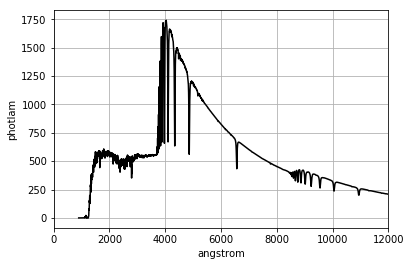

In [58]:
NewVega=S.Vega.convert('photlam')
plt.plot(S.Vega.wave, S.Vega.flux,'k-')
plt.xlim(0, 12000)
plt.xlabel(S.Vega.waveunits)
plt.ylabel(S.Vega.fluxunits)
#plt.title(os.path.basename(S.Vega.name))
plt.grid()

# Reference spectrum for calibration in AB

- reference flux in erg/cm2/s/Hz

In [59]:
print S.units.ABZERO

-48.6


In [60]:
# AB source in erg/cm2/s/Hz
f_0=10**(S.units.ABZERO/2.5)
print f_0

3.6307805477e-20


- generate the flux flat in Hz bins

In [61]:
calib_source=S.FlatSpectrum(10**(S.units.ABZERO/2.5),fluxunits='fnu')
print calib_source.flux

[  3.63078055e-20   3.63078055e-20   3.63078055e-20 ...,   3.63078055e-20
   3.63078055e-20   3.63078055e-20]


- plot flat spectrum 

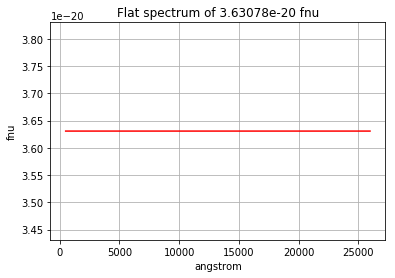

In [62]:
plt.plot(calib_source.wave,calib_source.flux,'r-')
plt.xlabel(calib_source.waveunits)
plt.ylabel(calib_source.fluxunits)
plt.title(calib_source.name)
#plt.ylim(0,2000.)
#plt.xlim(0.,11000.)
plt.grid()

- convert flat spectrum in photlam (photon/cm^2/s/A)

In [63]:
calib_source.convert('photlam')

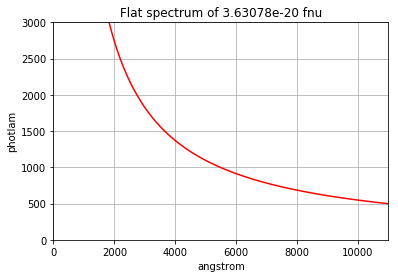

In [64]:
plt.plot(calib_source.wave,calib_source.flux,'r-')
plt.xlabel(calib_source.waveunits)
plt.ylabel(calib_source.fluxunits)
plt.title(calib_source.name)
plt.ylim(0,3000.)
plt.xlim(0.,11000.)
plt.grid()

In [65]:
calib_source.convert('flam')

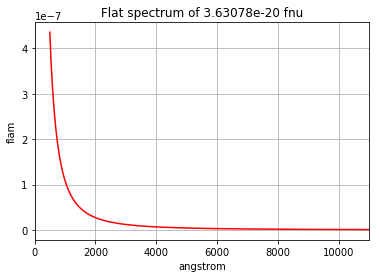

In [66]:
plt.plot(calib_source.wave,calib_source.flux,'r-')
plt.xlabel(calib_source.waveunits)
plt.ylabel(calib_source.fluxunits)
plt.title(calib_source.name)
#plt.ylim(0,3000.)
plt.xlim(0.,11000.)
plt.grid()

In [68]:
lambda_wl=calib_source.wave
S_lambda=f_0/lambda_wl**2*S.units.C
S_photons=f_0/lambda_wl

In [71]:
S.units.C

2.99792458e+18

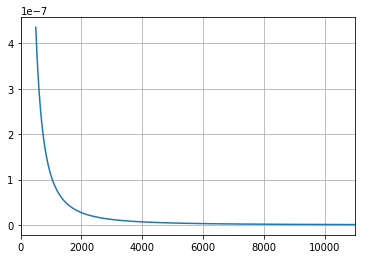

In [69]:
plt.plot(lambda_wl,S_lambda)
#plt.ylim(0,3000.)
plt.xlim(0.,11000.)
plt.grid()

# Reference spectrum in ST

- ST source in erg/cm2/s/A

In [ ]:
f_0_2=10**(S.units.STZERO/2.5)
print f_0_2

In [ ]:
calib_source2=S.FlatSpectrum(10**(S.units.STZERO/2.5),fluxunits='flam')
calib_source2.convert('photlam')

# Compare Vega spectrum with AB reference and ST reference spectra

In [ ]:
plt.plot(S.Vega.wave, S.Vega.flux,'b-')
plt.plot(calib_source.wave,calib_source.flux,'r-')
plt.plot(calib_source2.wave,calib_source2.flux,'g-')
plt.xlabel(calib_source.waveunits)
plt.ylabel(calib_source.fluxunits)
plt.title("Vega spectrum compared to calibration standard spectra")
plt.ylim(0,2000.)
plt.xlim(3000.,11000.)
plt.grid()

# Transmission in visible

In [ ]:
bp_V = S.ObsBandpass('johnson,v')

In [ ]:
plt.plot(S.Vega.wave, S.Vega.flux,'b-')
plt.plot(calib_source.wave,calib_source.flux,'r-')
plt.plot(calib_source2.wave,calib_source2.flux,'g-')
plt.xlabel(calib_source.waveunits)
plt.ylabel(calib_source.fluxunits)
plt.title("Vega spectrum compared to calibration standard spectra")
plt.ylim(0,2000.)
plt.xlim(3000.,11000.)
plt.grid()

plt.plot(bp_V.wave,700*bp_V.throughput,'k-')

# Observation of AB spectrun in V band

In [ ]:
obs = S.Observation(calib_source, bp_V)

In [ ]:
plt.plot(S.Vega.wave, S.Vega.flux,'b-')
plt.plot(calib_source.wave,calib_source.flux,'r-')
plt.plot(calib_source2.wave,calib_source2.flux,'g-')
plt.xlabel(calib_source.waveunits)
plt.ylabel(calib_source.fluxunits)
plt.title("Vega spectrum compared to calibration standard spectra")
plt.plot(obs.wave,obs.flux,'m-.')
plt.xlabel(obs.waveunits)
plt.ylabel(obs.fluxunits)
plt.ylim(0,2000.)
plt.xlim(3000.,11000.)
plt.grid()